In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import BorderlineSMOTE

In [74]:
df=pd.read_csv('winequality-red.csv',sep=';')
 #P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  #Modeling wine preferences by data mining from physicochemical properties.
  #In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In [6]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality'>

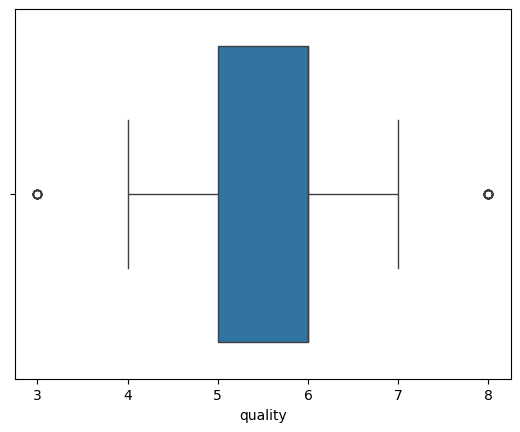

In [11]:
#hacer un boxplot para ver los outliers por categoria de quality
sns.boxplot(x='quality',data=df)




In [12]:
#determinar el Target

x=df.drop('quality', axis=1)
y=df['quality']

In [75]:
#dividir el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

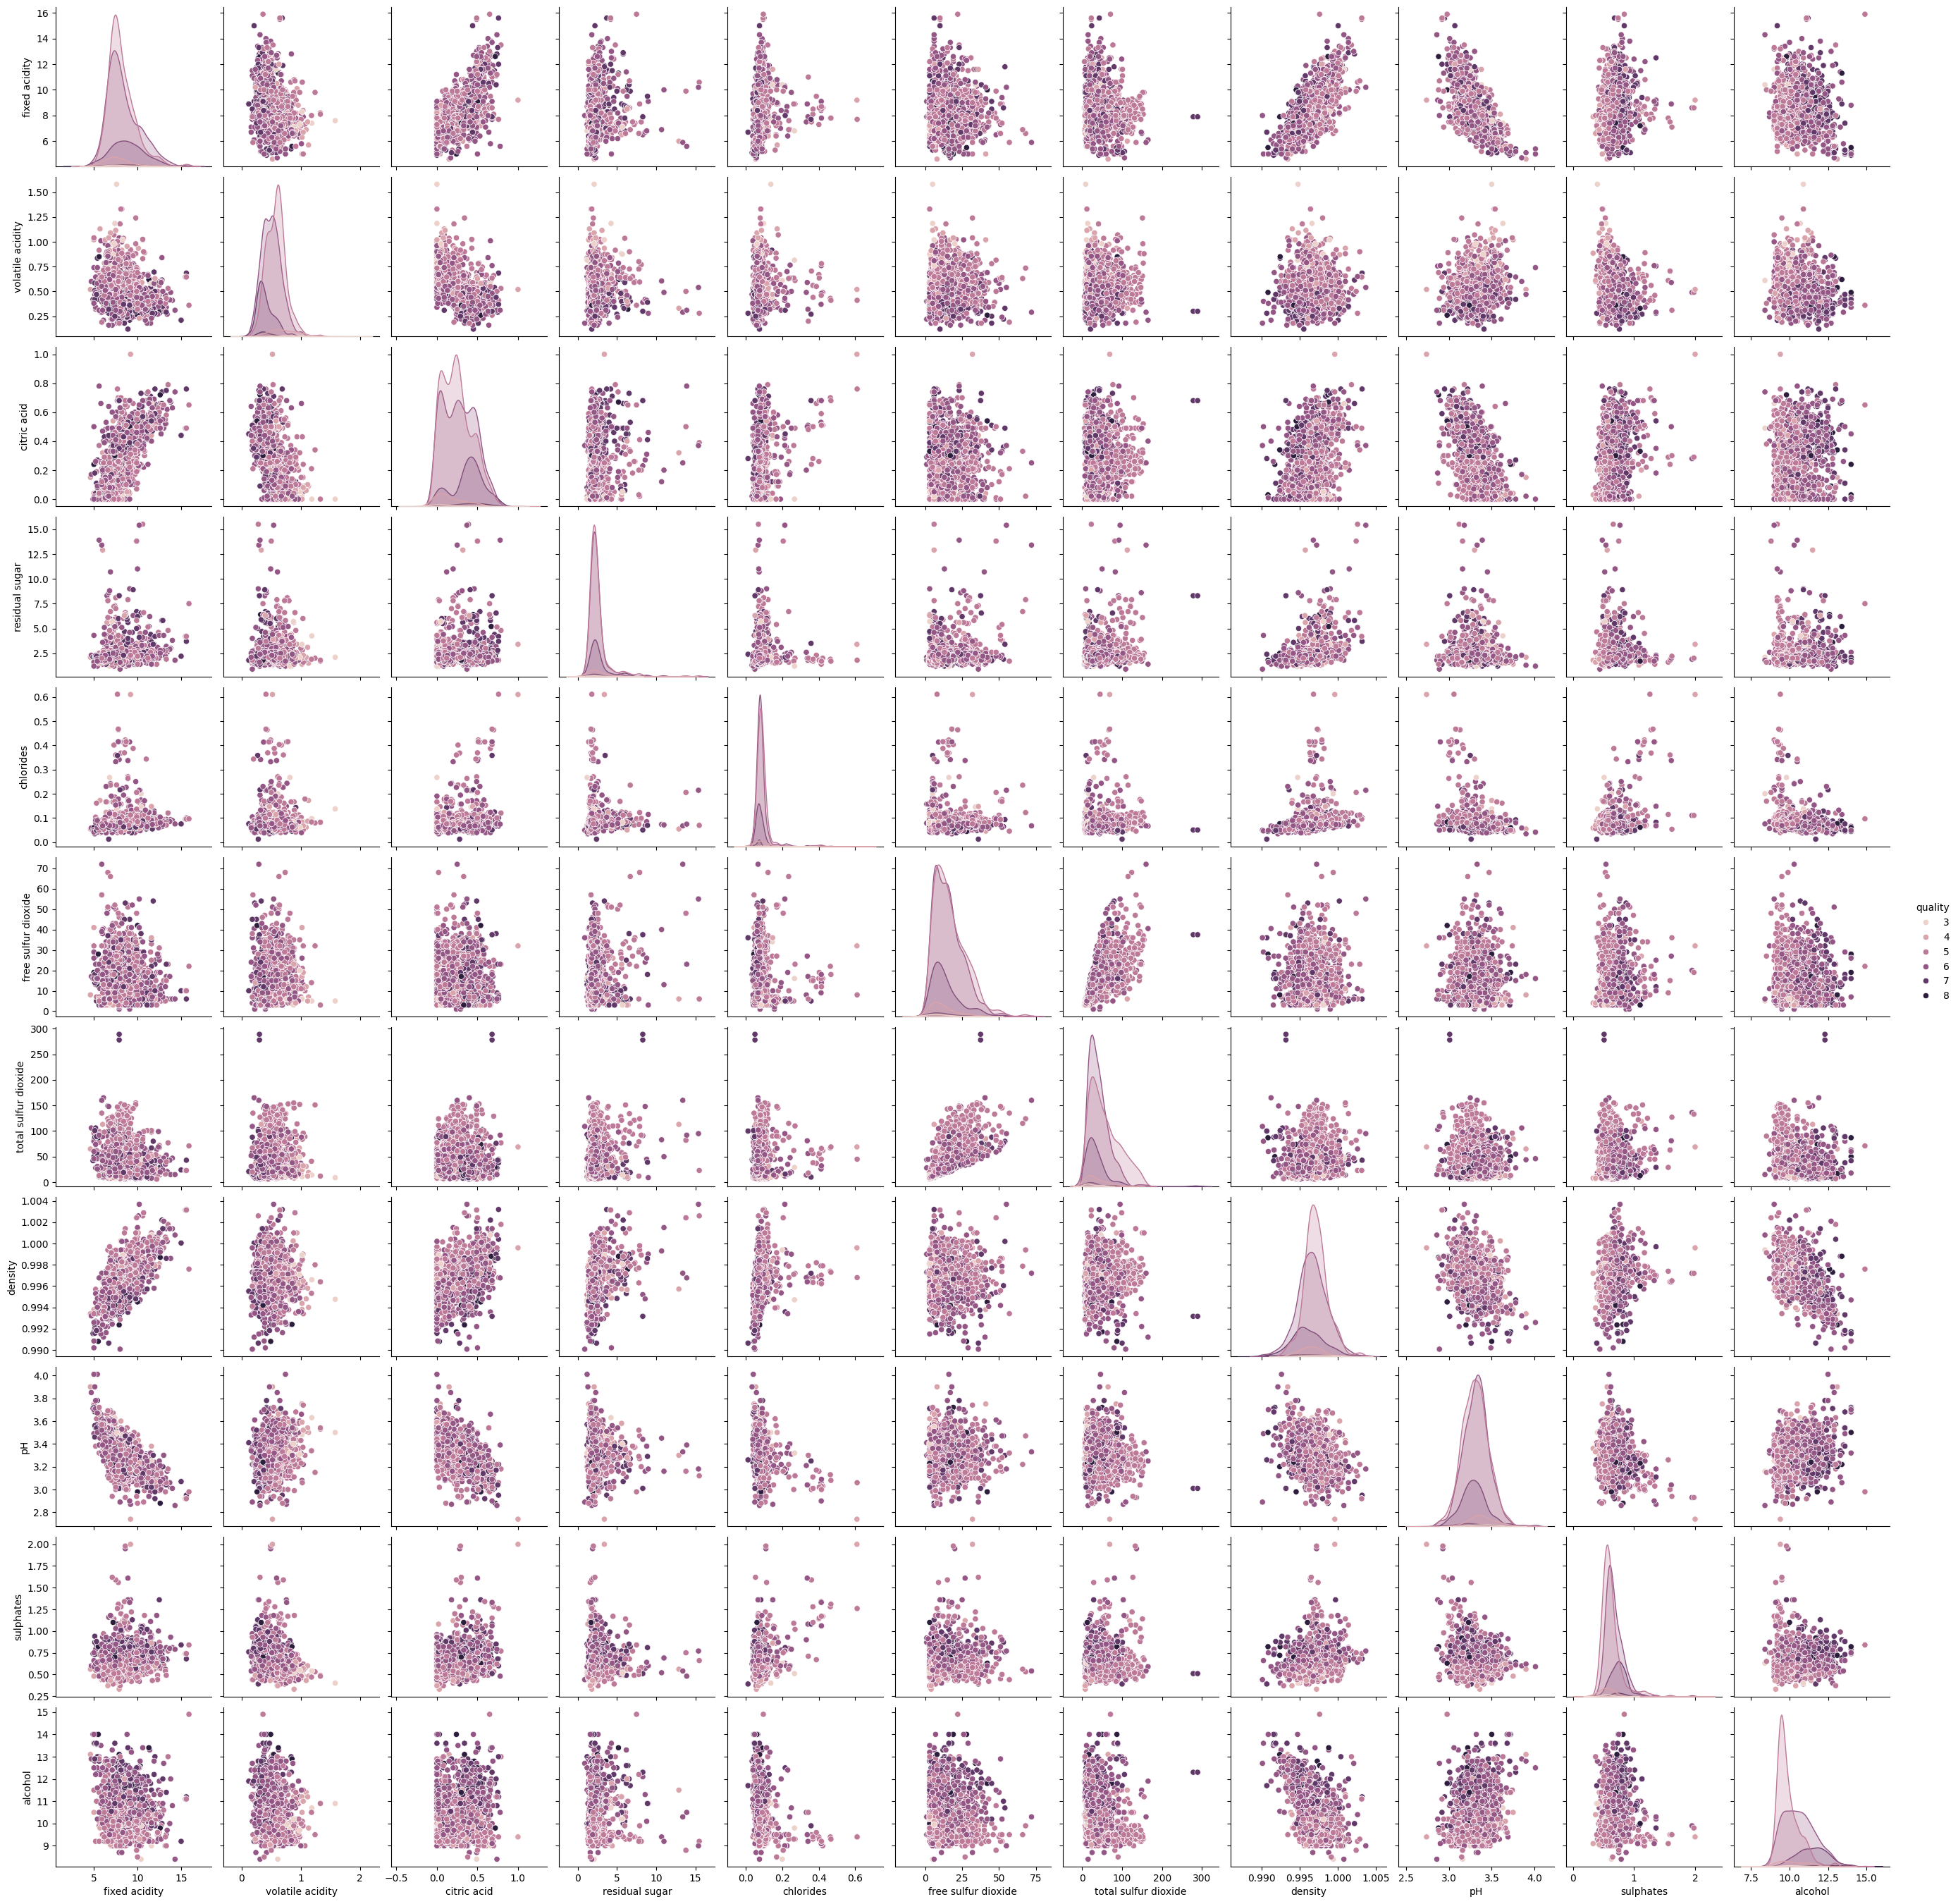

In [14]:
#pairplot para ver la relacion entre las variables
sns.pairplot(df, hue='quality')
plt.show()

APLICAMOS MODELO KNN

In [15]:
#KNN modelo productivo
knn = KNeighborsClassifier(n_neighbors=3)


In [16]:
#fit the model to the training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred_knn = knn.predict(x_test)

accuracy_score(y_test, y_pred_knn)

0.453125

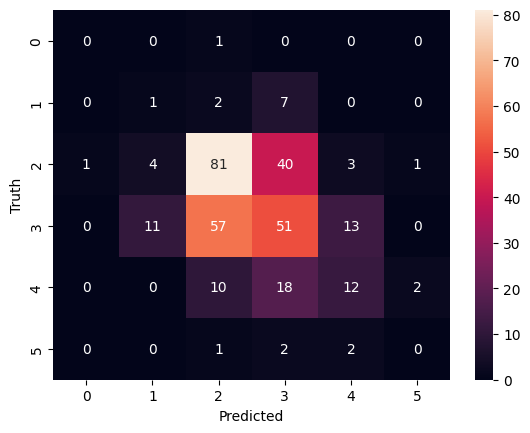

In [18]:
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [19]:
#calculate the recall 

from sklearn.metrics import recall_score

recall_score(y_test,y_pred_knn, average=None)



array([0.        , 0.1       , 0.62307692, 0.38636364, 0.28571429,
       0.        ])

In [20]:
#calculate the precision
from sklearn.metrics import precision_score


precision_score(y_test, y_pred_knn, average=None)

array([0.        , 0.0625    , 0.53289474, 0.43220339, 0.4       ,
       0.        ])

In [21]:
#calculate the f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_knn, average=None)

array([0.        , 0.07692308, 0.57446809, 0.408     , 0.33333333,
       0.        ])

In [76]:
#classification report  
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.10      0.08        10
           5       0.53      0.62      0.57       130
           6       0.43      0.39      0.41       132
           7       0.40      0.29      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.45       320
   macro avg       0.24      0.23      0.23       320
weighted avg       0.45      0.45      0.45       320



KNN no es el mejor modelo para este caso

NORMALIZAMOS PARA VOLVER A PROBAR EL KNN (con minMaxScaler generamos un rango de 0 a 1)

In [24]:
normalizer = MinMaxScaler()

Nunca se normaliza x_test ( el fit siempre es a x_train) porque no lo estamos entrenando, es un preprocesado.

In [26]:
normalizer.fit(x_train)

MinMaxScaler()

In [27]:
x_train_norm = normalizer.transform(x_train)

x_test_norm = normalizer.transform(x_test)

In [28]:
x_train_norm

array([[0.36283186, 0.39041096, 0.31      , ..., 0.58267717, 0.22699387,
        0.49230769],
       [0.13274336, 0.06164384, 0.4       , ..., 0.4015748 , 0.13496933,
        0.53846154],
       [0.55752212, 0.18493151, 0.47      , ..., 0.44094488, 0.23312883,
        0.21538462],
       ...,
       [0.2300885 , 0.34246575, 0.06      , ..., 0.60629921, 0.10429448,
        0.16923077],
       [0.2920354 , 0.05479452, 0.35      , ..., 0.45669291, 0.26380368,
        0.53846154],
       [0.10619469, 0.11643836, 0.26      , ..., 0.51181102, 0.10429448,
        0.78461538]], shape=(1279, 11))

In [29]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.362832,0.390411,0.31,0.143836,0.123539,0.328358,0.265018,0.743759,0.582677,0.226994,0.492308
1,0.132743,0.061644,0.40,0.034247,0.090150,0.589552,0.561837,0.082966,0.401575,0.134969,0.538462
2,0.557522,0.184932,0.47,0.061644,0.176962,0.074627,0.028269,0.596916,0.440945,0.233129,0.215385
3,0.371681,0.386986,0.26,0.047945,0.126878,0.223881,0.060071,0.504405,0.456693,0.061350,0.153846
4,0.336283,0.626712,0.15,0.349315,0.101836,0.149254,0.169611,0.655653,0.496063,0.073620,0.230769


In [30]:
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)
x_test_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.274336,0.301370,0.08,0.109589,0.170284,0.194030,0.141343,0.516153,0.393701,0.177914,0.184615
1,0.283186,0.260274,0.17,0.047945,0.116861,0.298507,0.339223,0.435389,0.511811,0.067485,0.169231
2,0.539823,0.376712,0.22,0.123288,0.158598,0.238806,0.098940,0.758443,0.425197,0.374233,0.230769
3,0.345133,0.232877,0.31,0.092466,0.110184,0.462687,0.183746,0.582232,0.464567,0.104294,0.215385
4,0.185841,0.232877,0.24,0.054795,0.108514,0.253731,0.098940,0.347283,0.511811,0.141104,0.338462


 KNN Clasification - Normalizado

In [31]:
#knn clasificacion
knn_N = KNeighborsClassifier(n_neighbors=3)


In [32]:
knn_N.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_N.score(x_test_norm, y_test)

0.534375

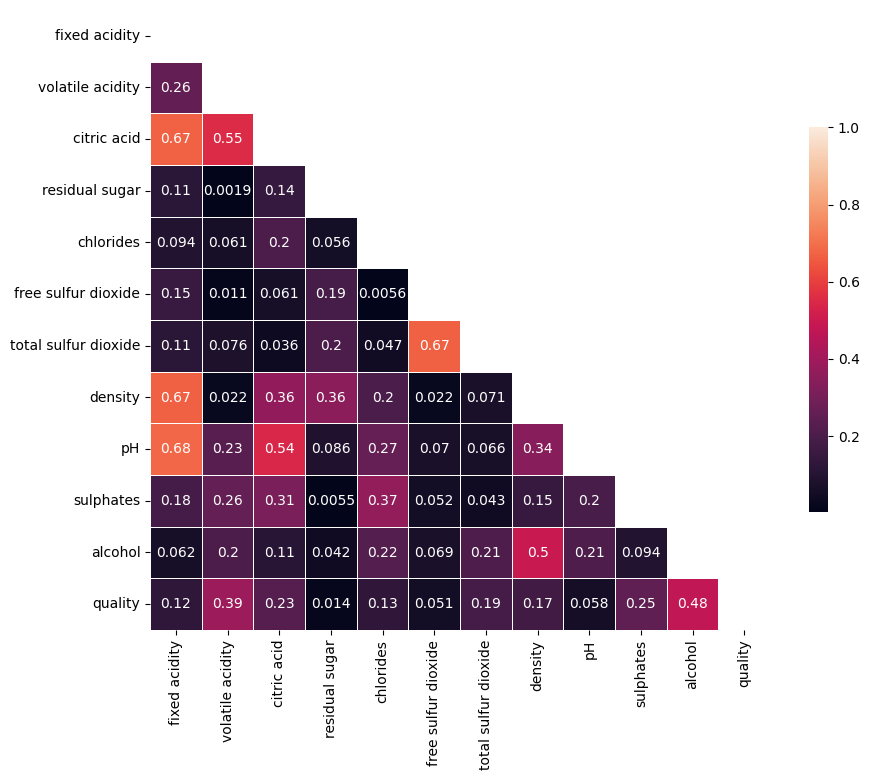

In [37]:
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [38]:
#elimino columna fixed acidity porque tiene alta correlacion con pH, density, citric acid
x_train_norm = x_train.drop('fixed acidity', axis=1)
x_test_norm = x_test.drop('fixed acidity', axis=1)

In [39]:
#aplico el NKK test de vuelta
knn_drop= KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_drop.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred_knn_drop = knn_drop.predict(x_test_norm)

accuracy_score(y_test, y_pred_knn_drop)

0.515625

In [42]:
knn_drop.score(x_test_norm, y_test)

0.515625

La columna fixed acidity al ser eliminada no mejora el modelo, lo empeora un poco. Debemos probar otros modelos.

MODELO DE REGRESION LOGISTICA

In [44]:
#aplico logistic regression

lr = LogisticRegression(max_iter=1000)


In [45]:
lr.fit(x_train, y_train)

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
lr.score(x_test, y_test)

0.56875

LogisticRegression NORMALIZADO

In [47]:
lr.fit(x_train_norm, y_train)

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
lr.score(x_test_norm, y_test)

0.575

Aplico el modelo de Decision Tree

In [49]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)

dt.score(x_test, y_test)


0.559375

DEcision Tree Normalizado

In [50]:
dt_norm = DecisionTreeClassifier(random_state=42)

In [51]:
dt_norm.fit(x_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:


dt_norm.score(x_test_norm, y_test)


0.575

RandomForest  Classifier Modelo productivo

In [53]:
#random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)

rf.score(x_test, y_test)



0.659375

RandomForestClassifier Normalizado

In [54]:
rf_norm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_norm.fit(x_train_norm, y_train)
rf_norm.score(x_test_norm, y_test)


0.66875

In [55]:
#precision del ramdon forest
y_pred_rf = rf.predict(x_test)
precision_score(y_test, y_pred_rf, average=None)

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.        , 0.        , 0.71532847, 0.62758621, 0.62857143,
       0.        ])

AdaBoostClassifier

In [56]:
#AdaBoost

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)
ada.score(x_test, y_test)


0.4875

ADABOOST NORMALIZADO

In [57]:
ada_norm = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_norm.fit(x_train_norm, y_train)
ada_norm.score(x_test_norm, y_test)

0.521875

GRADIENT BOOSTING

In [58]:
GradientBoostingClassifier

sklearn.ensemble._gb.GradientBoostingClassifier

In [59]:
#gradient boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
gb.score(x_test, y_test)


0.65

In [60]:
#aplicar al gradient boosting precision 
y_pred_gb = gb.predict(x_test)

precision_score(y_test, y_pred_gb, average=None)



array([0.        , 0.5       , 0.70422535, 0.62773723, 0.6       ,
       0.        ])

In [61]:
#recall
recall_score(y_test, y_pred_gb, average=None)

array([0.        , 0.1       , 0.76923077, 0.65151515, 0.5       ,
       0.        ])

In [62]:
#f1 score

f1_score(y_test, y_pred_gb, average=None)

array([0.        , 0.16666667, 0.73529412, 0.6394052 , 0.54545455,
       0.        ])

GradientBoostingClassifier NOrmalizado

In [63]:
#gradient boosting con normalizacion
gb_norm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_norm.fit(x_train_norm, y_train)
gb_norm.score(x_test_norm, y_test)

0.628125

In [64]:
#gradient boosting con normalizacion precision
y_pred_gb_norm = gb_norm.predict(x_test_norm)

precision_score(y_test, y_pred_gb_norm, average=None)


array([0.        , 0.66666667, 0.69117647, 0.5971223 , 0.59459459,
       0.        ])

In [65]:
#recall
recall_score(y_test, y_pred_gb_norm, average=None)

array([0.        , 0.2       , 0.72307692, 0.62878788, 0.52380952,
       0.        ])

In [66]:
#f1 score
f1_score(y_test, y_pred_gb_norm, average=None)

array([0.        , 0.30769231, 0.70676692, 0.61254613, 0.55696203,
       0.        ])

In [67]:
#classification report
print(classification_report(y_test, y_pred_gb_norm))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.67      0.20      0.31        10
           5       0.69      0.72      0.71       130
           6       0.60      0.63      0.61       132
           7       0.59      0.52      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.42      0.35      0.36       320
weighted avg       0.63      0.63      0.62       320



El modelo no tiene support en los valores 3,4 y 8. Decidimos a traves de Smote y valores sinteticos balancear los datos.

el Smote debe aplicarse antes de divivir la muestra en train y test. Utilizo un nuevo notebook, para volver a probar los modelos con los datos balanceados. Bebevino2.